# Test de récupération d'orbites de planètes en fonction du temps via AstroQuery

In [22]:
from astroquery.jplhorizons import Horizons
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
planet_ids: dict[str, str] = {
    "Mercure": "199",
    "Venus":   "299",
    "Terre":   "399",
    "Mars":    "499",
    "Jupiter": "599",
    "Saturne": "699",
    "Uranus":  "799",
    "Neptune": "899",
    #"Pluton": "999",
}

#start_time = "2025-01-01"
date_format: str = "%Y-%m-%d"
end_time: str = "2026-01-01"
start_time = datetime.strftime(datetime.strptime("2026-01-01", date_format) - timedelta(days=60_188), date_format)
time_step = '1d' # Intervalles de 1 jour

In [ ]:
planets_coordinates: dict[str, object] = {}

for name, id in planet_ids.items():
    obj = Horizons(id=id, location='500@0', epochs={'start': start_time, 'stop': end_time, 'step': time_step})
    planets_coordinates[id] = obj.vectors()

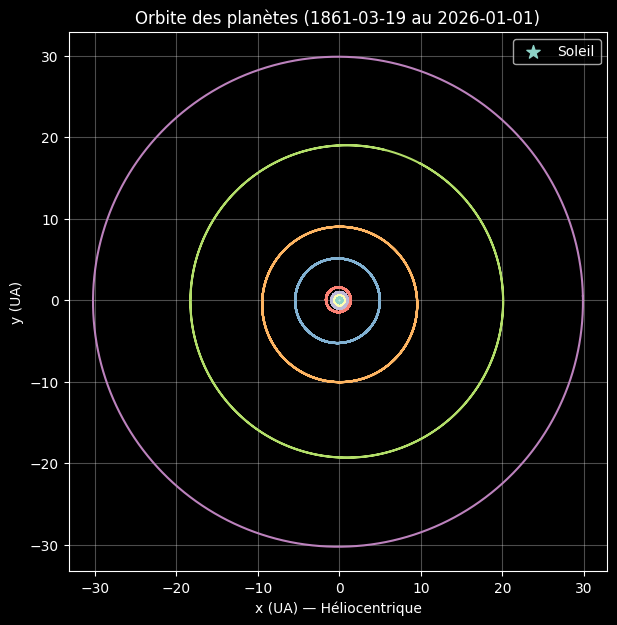

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
for planet_id in planets_coordinates:
    planet_coordinates = planets_coordinates[planet_id]
    ax.plot(planet_coordinates["x"], planet_coordinates["y"])

ax.scatter([0], [0], marker="*", s=100, label="Soleil")
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("x (UA) — Héliocentrique")
ax.set_ylabel("y (UA)")
ax.set_title(f"Orbites des planètes ({start_time} au {end_time})")
ax.grid(True, alpha=0.3)
ax.legend(ncol=2)
plt.show()